In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
UF = input("Digite o UF: ")
Shape = input("Digite os 2 primeiros digitos do shapefile: ")

Digite o UF: PA
Digite os 2 primeiros digitos do shapefile: 15


# Importando o shapefile

In [10]:
gdf = gpd.read_file('Shapes/'+UF+'/'+Shape+'SEE250GC_SIR.shp')
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8919 entries, 0 to 8918
Data columns (total 14 columns):
ID            8919 non-null int64
CD_GEOCODI    8919 non-null object
TIPO          8919 non-null object
CD_GEOCODB    1996 non-null object
NM_BAIRRO     1996 non-null object
CD_GEOCODS    8919 non-null object
NM_SUBDIST    0 non-null object
CD_GEOCODD    8919 non-null object
NM_DISTRIT    8919 non-null object
CD_GEOCODM    8919 non-null object
NM_MUNICIP    8919 non-null object
NM_MICRO      8919 non-null object
NM_MESO       8919 non-null object
geometry      8919 non-null object
dtypes: int64(1), object(13)
memory usage: 975.6+ KB


In [11]:
gdf.sort_values('CD_GEOCODI',inplace = True)

# Importando os resultados do universo

In [12]:
dados = pd.read_csv('Planilhas/'+UF+'/CSV/Basico_'+UF+'.csv',sep =';')

In [13]:
dados.rename(columns={'Cod_setor':'CD_GEOCODI'}, inplace=True)
dados.shape

(8769, 13)

In [14]:
dados.head()

,CD_GEOCODI,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,150010705000001,352.0,1368.0,"3,89","3,87","1439,33","2568050,48","1539,95","2592702,68","765,92","1622948,78","1251,81","2044853,2"
1,150010705000002,244.0,987.0,"4,05","4,77","1158,27","1927166,82","1250,52","1965465,56","636,93","1157718,13","1052,81","1476427,08"
2,150010705000003,395.0,1654.0,"4,19","4,91","643,34","441332,01","723,99",438260,"408,16","4845474,47","762,08","8782625,99"
3,150010705000004,338.0,1510.0,"4,47","5,5","970,28","1813231,02","1075,27","1896807,64","483,91","795995,02","824,84","1075964,74"
4,150010705000005,255.0,1101.0,"4,32","5,9","1227,67","4476840,61","1283,02","4608193,69","608,37","1631419,2","993,29","2282394,12"


# Fazendo um merge entre o geodataframe e o dataframe de dados do universo

In [15]:
gdf['CD_GEOCODI']= pd.to_numeric(gdf['CD_GEOCODI'])

In [16]:
df = pd.merge(gdf,dados, on='CD_GEOCODI')

In [17]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 8769 entries, 0 to 8768
Data columns (total 26 columns):
ID            8769 non-null int64
CD_GEOCODI    8769 non-null int64
TIPO          8769 non-null object
CD_GEOCODB    1985 non-null object
NM_BAIRRO     1985 non-null object
CD_GEOCODS    8769 non-null object
NM_SUBDIST    0 non-null object
CD_GEOCODD    8769 non-null object
NM_DISTRIT    8769 non-null object
CD_GEOCODM    8769 non-null object
NM_MUNICIP    8769 non-null object
NM_MICRO      8769 non-null object
NM_MESO       8769 non-null object
geometry      8769 non-null object
V001          8763 non-null float64
V002          8763 non-null float64
V003          8763 non-null object
V004          8763 non-null object
V005          8763 non-null object
V006          8763 non-null object
V007          8741 non-null object
V008          8741 non-null object
V009          8769 non-null object
V010          8769 non-null object
V011          8753 non-null object
V012         

In [18]:
del gdf
del dados

Text(0.5,1,'PA')

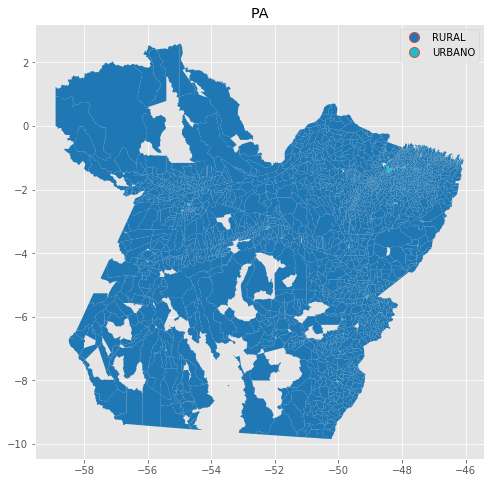

In [19]:
plt.style.use('ggplot')
df.plot(column = 'TIPO',figsize = (17,8),legend = True)
plt.title(UF)

# Utilizando a projeção de Albers para calcular as áreas

In [20]:
df['AREA'] = df.to_crs({'proj': 'aea'}).geometry.area/10**6

# Importando as regiões urbanas definidas pelo estudo da EMBRAPA em 2015

In [21]:
areas_urbanas_br_15 = gpd.read_file('Embrapa/areas_urbanas_br_15.shp')

In [22]:
areas_urbanas_br_15['Area'] = areas_urbanas_br_15.to_crs({'proj': 'aea'}).geometry.area/10**6

In [23]:
areas_urbanas_df_15 = areas_urbanas_br_15[areas_urbanas_br_15['UF']==UF]
del areas_urbanas_br_15

In [24]:
areas_urbanas_df_15.head()

,Municipio,UF,Area_Urb,Geocodigo,geometry,Area
1274,SÃ£o Caetano de Odivelas,PA,2.255,1507102.0,POLYGON ((-48.01648062789297 -0.74370638230234...,2.255317
1299,Sapucaia,PA,1.245,1507755.0,POLYGON ((-49.70425641051931 -6.93784016426552...,1.244518
2480,AfuÃ¡,PA,1.039,1500305.0,(POLYGON ((-50.39415924736625 -0.1641994395816...,1.038729
3000,Ãgua Azul do Norte,PA,2.620,1500347.0,POLYGON ((-50.49144061524354 -6.80755455463419...,2.619857
3010,Abaetetuba,PA,15.595,1500107.0,(POLYGON ((-48.89479239219038 -1.7381371261334...,15.595351


In [25]:
areas_urbanas_df_15.rename(columns={'Geocodigo':'CD_GEOCODM'}, inplace=True)
areas_urbanas_df_15['CD_GEOCODM']=areas_urbanas_df_15['CD_GEOCODM'].apply(lambda x: int(x))
areas_urbanas_df_15.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 143 entries, 1274 to 3151
Data columns (total 6 columns):
Municipio     143 non-null object
UF            143 non-null object
Area_Urb      143 non-null float64
CD_GEOCODM    143 non-null int64
geometry      143 non-null object
Area          143 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 7.8+ KB


In [26]:
df.fillna('0',inplace = True)

# Visualizando as distribuições de Moradias, Moradores e área 

/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Nº de Moradias no PA')

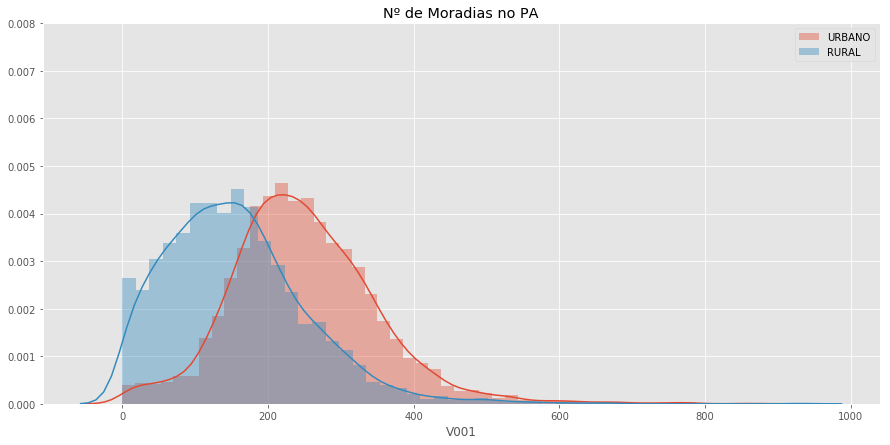

In [27]:
plt.style.use('ggplot')
df['V001'] = pd.to_numeric(df['V001'])
df['V002'] = pd.to_numeric(df['V002'])
fig = plt.figure(figsize = (15,7))
sns.distplot(df[df['TIPO'] =='URBANO']['V001'])
sns.distplot(df[df['TIPO']=='RURAL']['V001'])
plt.legend(['URBANO','RURAL'])
plt.ylim((0,0.008))
plt.title('Nº de Moradias no '+UF)

## Descrição do Número de Moradias por setor censitários urbanos e rurais

In [28]:
print('RURAL','\n',df[df['TIPO']=='RURAL']['V001'].describe())
print('URBANO','\n',df[df['TIPO']=='URBANO']['V001'].describe())

RURAL 
 count    3469.000000
mean      155.249351
std        97.285498
min         0.000000
25%        84.000000
50%       146.000000
75%       208.000000
max       930.000000
Name: V001, dtype: float64
URBANO 
 count    5300.000000
mean      249.170755
std       100.769572
min         0.000000
25%       185.000000
50%       241.000000
75%       307.000000
max       875.000000
Name: V001, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.05)

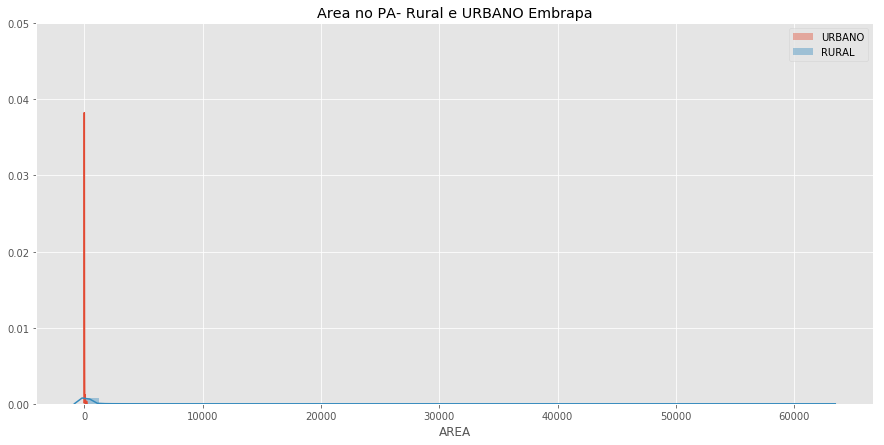

In [29]:
fig = plt.figure(figsize = (15,7))

sns.distplot(areas_urbanas_df_15['Area'])
plt.legend(['URBANO'])
sns.distplot(df[df['TIPO']=='RURAL']['AREA'])
plt.legend(['URBANO','RURAL'])
plt.title('Area no ' +UF+'- Rural e URBANO Embrapa')
plt.ylim((0,0.05))

In [30]:
df['Densidade Moradias'] = df.V001/df.AREA

/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Densidade de moradias')

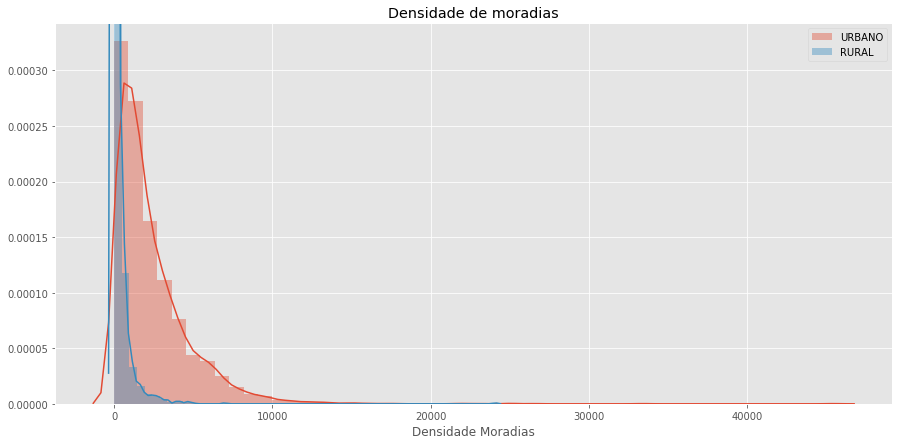

In [31]:
plt.style.use('ggplot')
fig = plt.figure(figsize = (15,7))

sns.distplot(df[df['TIPO']=='URBANO']['Densidade Moradias'])
sns.distplot(df[df['TIPO']=='RURAL']['Densidade Moradias'])
plt.legend(['URBANO','RURAL'])
plt.title('Densidade de moradias')
#plt.ylim((0,0.05))

In [32]:
print('RURAL','\n',df[df['TIPO']=='RURAL']['Densidade Moradias'].describe())
print('URBANO','\n',df[df['TIPO']=='URBANO']['Densidade Moradias'].describe())

RURAL 
 count     3469.000000
mean       151.128316
std        592.307663
min          0.000000
25%          0.502617
50%          1.788487
75%         20.673970
max      24059.556789
Name: Densidade Moradias, dtype: float64
URBANO 
 count     5300.000000
mean      2353.640750
std       2438.848258
min          0.000000
25%        765.442996
50%       1639.271095
75%       3201.397535
max      45425.635031
Name: Densidade Moradias, dtype: float64


In [33]:
df[(df['TIPO']=='RURAL')&(df['Densidade Moradias']>df['Densidade Moradias'].quantile(q=0.5))].describe()

,ID,CD_GEOCODI,V001,V002,AREA,Densidade Moradias
count,218.000000,2.180000e+02,218.000000,218.000000,218.000000,218.000000
mean,12763.972477,1.504051e+14,193.669725,796.495413,0.171870,1532.173446
std,2234.209521,2.200938e+11,97.950571,414.021652,0.103999,1812.177195
min,8093.000000,1.500206e+14,36.000000,148.000000,0.004281,647.231436
25%,11446.250000,1.502301e+14,127.250000,508.750000,0.091369,784.595553
50%,12726.500000,1.503705e+14,179.500000,714.500000,0.156283,1070.859166
75%,14283.750000,1.505502e+14,238.750000,1015.500000,0.239072,1650.905776
max,16750.000000,1.508357e+14,669.000000,2894.000000,0.543194,24059.556789


## Descrição da área por setor censitários urbanos e rurais

In [34]:
print('URBANO','\n',areas_urbanas_df_15['Area'].describe())
print('RURAL','\n',df[df['TIPO']=='RURAL']['AREA'].describe())

URBANO 
 count    143.000000
mean      11.278490
std       21.598645
min        0.557564
25%        2.300509
50%        5.147532
75%       10.595321
max      199.484832
Name: Area, dtype: float64
RURAL 
 count     3469.000000
mean       314.666103
std       1419.786740
min          0.004281
25%          5.557523
50%         77.152080
75%        238.403146
max      62622.286913
Name: AREA, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.003)

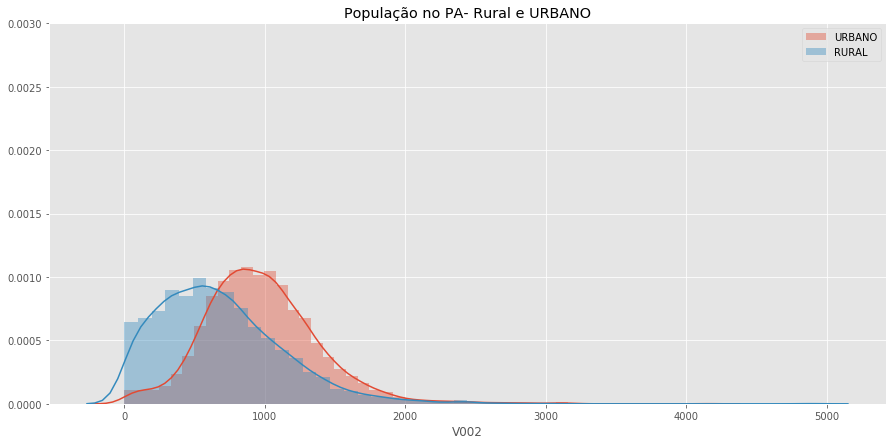

In [35]:
fig = plt.figure(figsize = (15,7))

sns.distplot(df[df['TIPO']=='URBANO']['V002'])
plt.legend(['URBANO'])
sns.distplot(df[df['TIPO']=='RURAL']['V002'])
plt.legend(['URBANO','RURAL'])
plt.title('População no '+UF+'- Rural e URBANO')
plt.ylim((0,0.003))

## Descrição do Número de moradores por setor censitários urbanos e rurais

In [36]:
print('RURAL','\n',df[df['TIPO']=='RURAL']['V002'].describe())
print('URBANO','\n',df[df['TIPO']=='URBANO']['V002'].describe())

RURAL 
 count    3469.000000
mean      681.693572
std       448.807275
min         0.000000
25%       350.000000
50%       619.000000
75%       937.000000
max      4887.000000
Name: V002, dtype: float64
URBANO 
 count    5300.000000
mean      976.765283
std       410.408763
min         0.000000
25%       705.750000
50%       943.000000
75%      1207.000000
max      4158.000000
Name: V002, dtype: float64


# Definindo os limites para filtrar os setores censitários 

In [37]:
max_area = areas_urbanas_df_15['Area'].mean() 
min_pop =  df[df['TIPO']=='URBANO']['V002'].mean()
min_mor =  df[df['TIPO']=='URBANO']['V001'].mean()
min_densidade_moradias = df[df['TIPO']=='URBANO']['Densidade Moradias'].quantile(q = 0.5)

In [38]:
scrcu = df[(df.TIPO=='RURAL')&(df.V001 >= min_mor)&(df.AREA <= max_area)&(df.V002>= min_pop)\
           &(df['Densidade Moradias']>= min_densidade_moradias)]

In [39]:
scrcu.describe()

,ID,CD_GEOCODI,V001,V002,AREA,Densidade Moradias
count,11.000000,1.100000e+01,11.000000,11.000000,11.000000,11.000000
mean,14226.272727,1.505663e+14,422.272727,1697.545455,0.167465,2674.086393
std,2208.753272,2.313332e+11,144.441747,594.788595,0.062239,925.913407
min,9379.000000,1.501303e+14,269.000000,1096.000000,0.079910,1799.103900
25%,12986.000000,1.504056e+14,328.500000,1245.500000,0.122940,2061.369247
50%,14281.000000,1.505502e+14,380.000000,1521.000000,0.162458,2400.219232
75%,16213.000000,1.507953e+14,504.500000,1990.000000,0.185841,2947.176486
max,16232.000000,1.507953e+14,669.000000,2894.000000,0.297926,4999.766504


Text(0.5,1,'SCRCU - Por Município')

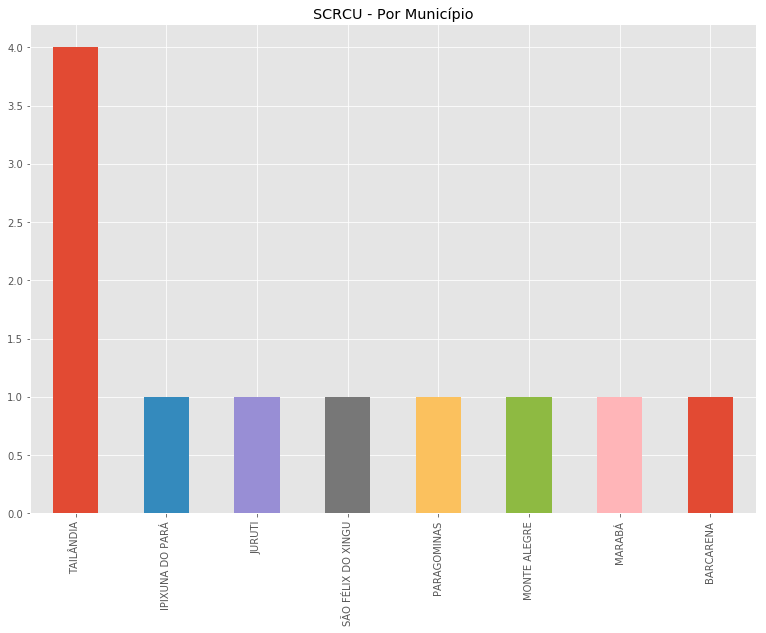

In [40]:
plt.style.use('ggplot')
scrcu.NM_MUNICIP.value_counts().plot.bar(figsize = (13,9))
plt.title('SCRCU - Por Município')

# Visualizando as areas urbanas no estado - Sobrepondo scrcu e as regioes urbanas definidas pelo estudo da embrapa

/home/alan/.local/lib/python3.6/site-packages/geopandas/plotting.py:393: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "'color'.", UserWarning)


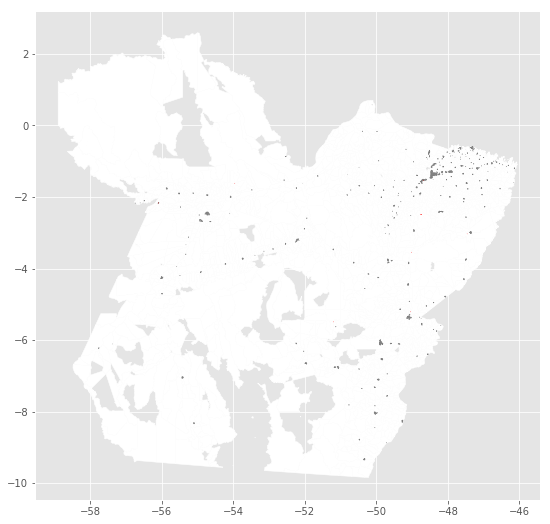

In [41]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (15,9))
ax.set_aspect('equal')
df.plot(ax=ax, color='white', edgecolor='white')
areas_urbanas_df_15.plot(ax=ax, color='gray', edgecolor='gray')
scrcu.plot(ax=ax,column = 'CD_GEOCODI',color = 'red',edgecolor='red')

In [42]:
areas_urbanas_df_15.rename(columns={'Area':'AREA'},inplace = True)

In [43]:
fonte = np.zeros(areas_urbanas_df_15.shape[0])
areas_urbanas_df_15['FONTE'] = fonte

In [44]:
fonte_1 = np.zeros(scrcu.shape[0])+1
scrcu['FONTE'] = fonte_1

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [45]:
regioes_urbanas_df = scrcu[['geometry','FONTE']].append(areas_urbanas_df_15[['geometry','FONTE']])

In [46]:
regioes_urbanas_df.head()

,geometry,FONTE
1356,POLYGON ((-48.68101472927989 -1.52814132939973...,1.0
4391,POLYGON ((-49.02123954065319 -3.53932797168909...,1.0
4804,"POLYGON ((-56.0960853245647 -2.16772694195976,...",1.0
5051,"POLYGON ((-49.0441879439547 -5.20701254431252,...",1.0
5601,"POLYGON ((-53.958988691025 -1.6164534401156, -...",1.0


In [47]:
def fonte(x):
    if x == 0:
        return 'EMBRAPA'
    return 'ALAN'
regioes_urbanas_df['FONTE'] = regioes_urbanas_df['FONTE'].apply(fonte) 

In [48]:
regioes_urbanas_df.to_file(driver = 'ESRI Shapefile',filename ='regioes_urbanas_'+UF+'.shp')

In [49]:
import mplleaflet
f, ax = plt.subplots(1,figsize = (15,7))
regioes_urbanas_df[regioes_urbanas_df['FONTE']=='ALAN'].plot(ax=ax,color = 'red',edgecolor='red')
regioes_urbanas_df[regioes_urbanas_df['FONTE']=='EMBRAPA'].plot(ax=ax,color = 'purple',edgecolor='purple')

mplleaflet.display(fig=f,crs=regioes_urbanas_df.crs)